## Requirements

Imports


In [2]:
import pandas as pd
import numpy as np

import regex as re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

from sklearn.metrics import pairwise_distances, mutual_info_score
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier


from wordcloud import WordCloud, STOPWORDS

import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import pickle
import gensim

Downloads

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\soham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\soham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\soham\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\soham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\soham\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\soham\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already

True

Data Loading

In [4]:
main_df = pd.read_csv(r"C:\Users\soham\Downloads\Untitled-project\train.csv")

main_df

id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]

In [5]:
main_df = main_df.drop(['id'], axis=1)

In [6]:
main_df

label                                              tweet
0          0   @user when a father is dysfunctional and is s...
1          0  @user @user thanks for #lyft credit i can't us...
2          0                                bihday your majesty
3          0  #model   i love u take with u all the time in ...
4          0             factsguide: society now    #motivation
...      ...                                                ...
31957      0  ate @user isz that youuu?ðððððð...
31958      0    to see nina turner on the airwaves trying to...
31959      0  listening to sad songs on a monday morning otw...
31960      1  @user #sikh #temple vandalised in in #calgary,...
31961      0                   thank you @user for you follow  

[31962 rows x 2 columns]

## PreProcessing

Preprocessing the data



In [7]:
slang_dict = abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "fk" : "fuck",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "ur" : "you are",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [8]:
# Define the preprocessing function
def preprocess_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r"http\S+", "", tweet)
    tweet_word_list = tweet.split()
    
    # Replace slang words with full form
    for i,words in enumerate(tweet_word_list):
        if words in slang_dict:
            tweet_word_list[i] = slang_dict[words]
            
    tweet = ' '.join(tweet_word_list)
            
    # Remove user mentions
    tweet = re.sub(r"@\S+", "", tweet)

    # Tokenize the tweet using TweetTokenizer
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tokens = tokenizer.tokenize(tweet)

    # Remove tokens that begin with "@"
    tokens = [token for token in tokens if not token.startswith("@")]

    # Remove stopwords
    stop_words = stopwords.words("english")
    tokens = [token for token in tokens if token not in stop_words]

    # Stem the tokens using PorterStemmer
    # stemmer = PorterStemmer()
    #tokens = [stemmer.stem(token) for token in tokens]
    
    # Lemmatize the tokens using WordNetLemmatizer
    # Initialize a stemmer object and lemmatizer object
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Remove special characters and numbers (except for "#")
    token_list = []
    for token in tokens:
        k = re.sub(r"[^a-zA-Z#]", "", token)
        if k != "":
            token_list.append(k)

    # Replace slang words with full form (again)
    for i, words in enumerate(token_list):
        if words in slang_dict:
            token_list[i] = slang_dict[words]

    # Join the tokens back into a single string
    preprocessed_tweet = " ".join(token_list)

    if tweet != preprocessed_tweet:
        token_list, preprocessed_tweet = preprocess_tweet(preprocessed_tweet) #preprocessing it until convergence
    
    return token_list, preprocessed_tweet


In [9]:
def get_preprocessed_df(df):
    tokens_list = []
    preprocessed_tweet_list = []

    for index, row in df.iterrows():
        tokens, preprocessed_tweet = preprocess_tweet(row['tweet'])
        tokens_list.append(tokens)
        preprocessed_tweet_list.append(preprocessed_tweet)
    token_df = pd.DataFrame({'tokens': [token for token in tokens_list]})
    pre_processed_df  = pd.DataFrame(preprocessed_tweet_list, columns=['preprocessed_tweet'])
    df = pd.concat([df, token_df, pre_processed_df], axis = 1)
    
            
    return df

In [10]:
preprocessed_df = get_preprocessed_df(main_df)

In [11]:
preprocessed_df

label                                              tweet  \
0          0   @user when a father is dysfunctional and is s...   
1          0  @user @user thanks for #lyft credit i can't us...   
2          0                                bihday your majesty   
3          0  #model   i love u take with u all the time in ...   
4          0             factsguide: society now    #motivation   
...      ...                                                ...   
31957      0  ate @user isz that youuu?ðððððð...   
31958      0    to see nina turner on the airwaves trying to...   
31959      0  listening to sad songs on a monday morning otw...   
31960      1  @user #sikh #temple vandalised in in #calgary,...   
31961      0                   thank you @user for you follow     

                                                  tokens  \
0      [father, dysfunctional, selfish, drag, kid, dy...   
1      [thanks, #lyft, credit, cant, use, cause, offe...   
2                                      [bihday, majesty]   
3                             [#model, love, take, time]   
4                     [factsguide, society, #motivation]   
...                                                  ...   
31957                                  [ate, isz, youuu]   
31958  [see, nina, turner, airwave, trying, wrap, man...   
31959  [listening, sad, song, monday, morning, otw, w...   
31960  [#sikh, #temple, vandalised, #calgary, #wso, c...   
31961                                    [thank, follow]   

                                      preprocessed_tweet  
0      father dysfunctional selfish drag kid dysfunct...  
1      thanks #lyft credit cant use cause offer wheel...  
2                                         bihday majesty  
3                                  #model love take time  
4                         factsguide society #motivation  
...                                                  ...  
31957                                      ate isz youuu  
31958  see nina turner airwave trying wrap mantle gen...  
31959     listening sad song monday morning otw work sad  
31960  #sikh #temple vandalised #calgary #wso condemn...  
31961                                       thank follow  

[31962 rows x 4 columns]

In [12]:
length_list = 0
index_list = []
for index,row in preprocessed_df.iterrows():
        if(len(row['preprocessed_tweet'])==0):
            # print(index)
            index_list.append(index)
            # print(row['tweet'])
            length_list+=1
            
            # df.iloc[index,row]=np.nan
            
print(length_list)

34


In [13]:
def remove_empty_strings(df):
    length_list = 0
    index_list = []
    for index,row in df.iterrows():
            if(len(row['preprocessed_tweet'])==0):
                # print(index)
                index_list.append(index)
                # print(row['tweet'])
                length_list+=1           
                # df.iloc[index,row]=np.nan           
    print(length_list)
    df.drop(index_list, inplace=True)

In [14]:
remove_empty_strings(preprocessed_df)

34


Data Visualization

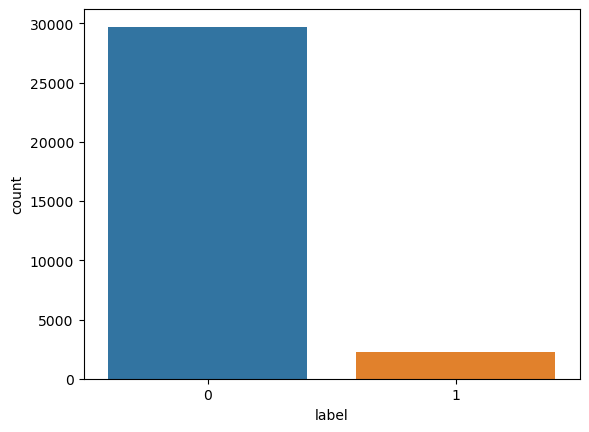

In [15]:
sns.countplot(data = main_df,x='label')
plt.show()

In [16]:
def word_cloud(input):
    comment_words = ''
    stopwords = set(STOPWORDS)
    
    # iterate through the csv file
    for val in input:
        
        # typecaste each val to string
        val = str(val)
    
        # split the value
        tokens = val.split()
        
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        
        comment_words += " ".join(tokens)+" "
    
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)
    # plot the WordCloud image           
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    
    plt.show()

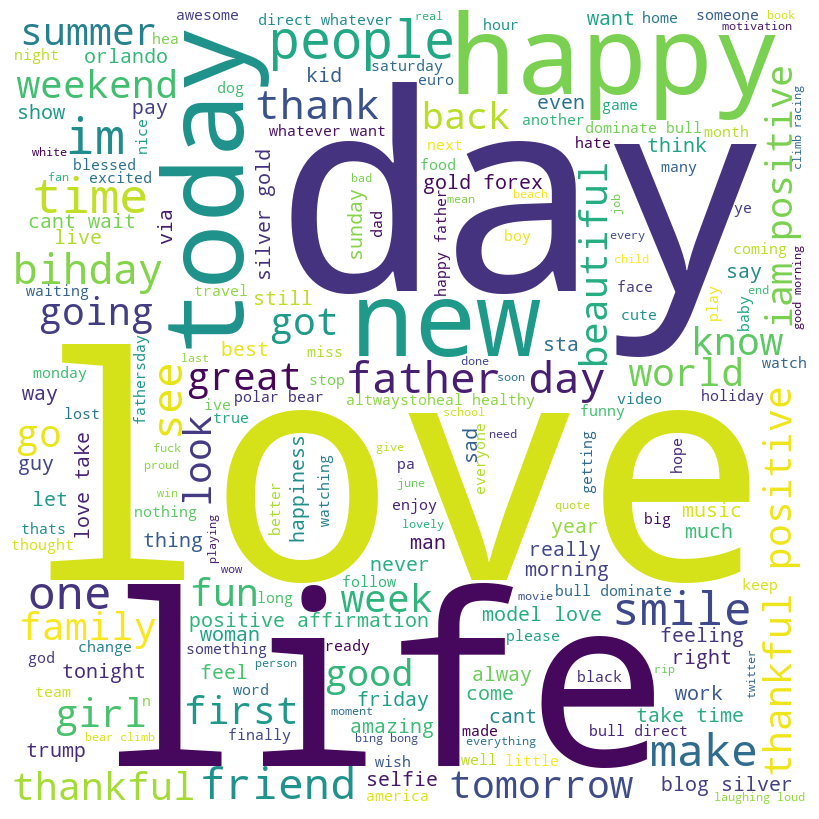

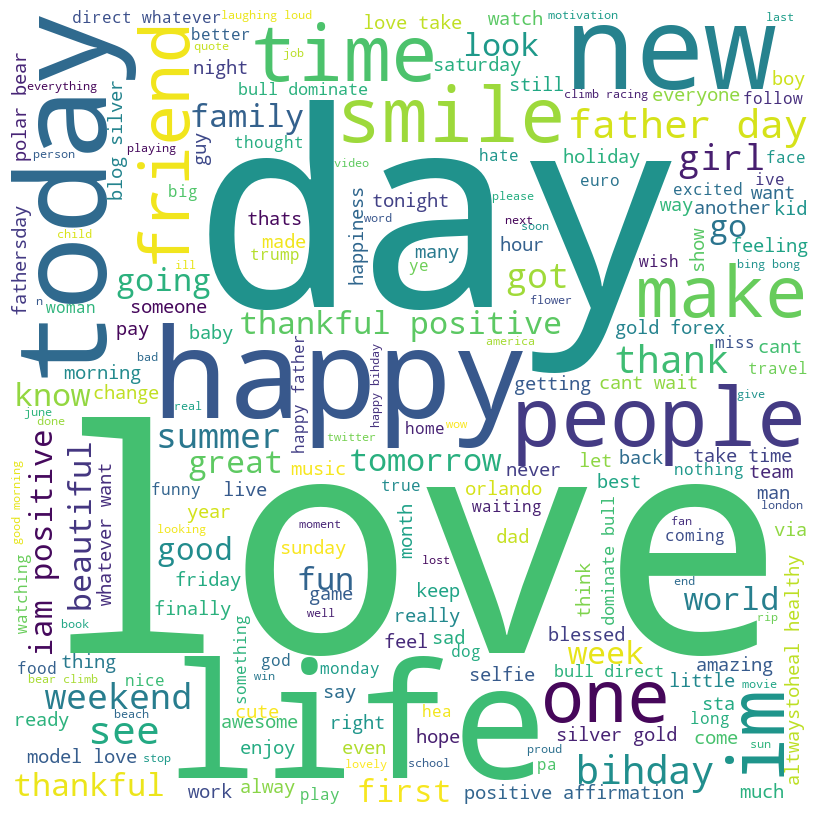

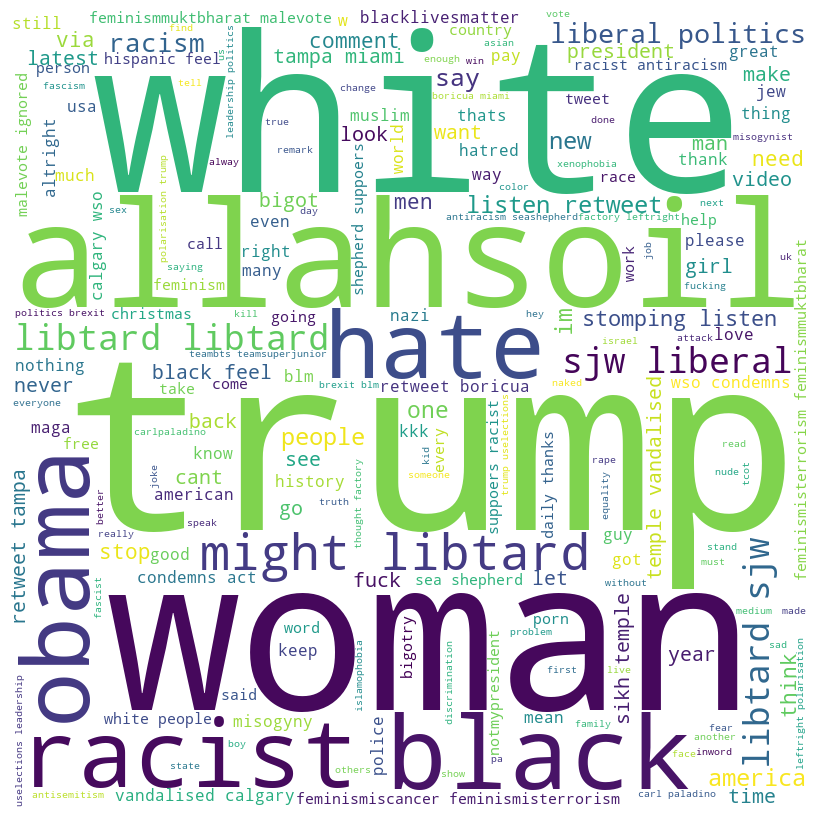

In [17]:
word_cloud(preprocessed_df['preprocessed_tweet'])#Existence of majority words in tweets
word_cloud(preprocessed_df['preprocessed_tweet'][preprocessed_df['label']==0])#Existence of majority words in positive tweets
word_cloud(preprocessed_df['preprocessed_tweet'][preprocessed_df['label']==1])# Existence of majority words in hateful tweets

Making Corpus for further uses

In [18]:
def make_corpus(df,input):
    corpus = []
    for index,row in df.iterrows():
        corpus.append(row[input])
    return corpus

In [19]:
preprocessed_df.head()

label                                              tweet  \
0      0   @user when a father is dysfunctional and is s...   
1      0  @user @user thanks for #lyft credit i can't us...   
2      0                                bihday your majesty   
3      0  #model   i love u take with u all the time in ...   
4      0             factsguide: society now    #motivation   

                                              tokens  \
0  [father, dysfunctional, selfish, drag, kid, dy...   
1  [thanks, #lyft, credit, cant, use, cause, offe...   
2                                  [bihday, majesty]   
3                         [#model, love, take, time]   
4                 [factsguide, society, #motivation]   

                                  preprocessed_tweet  
0  father dysfunctional selfish drag kid dysfunct...  
1  thanks #lyft credit cant use cause offer wheel...  
2                                     bihday majesty  
3                              #model love take time  
4                     factsguide society #motivation

In [20]:
def make_corpus(df,column_name):
    corpus = []
    for index,row in df.iterrows():
        corpus.append(row[column_name])
    return corpus

In [21]:
df_corpus = make_corpus(preprocessed_df,'preprocessed_tweet')

In [22]:
print(df_corpus)

['father dysfunctional selfish drag kid dysfunction #run', 'thanks #lyft credit cant use cause offer wheelchair van pdx #disapointed #getthanked', 'bihday majesty', '#model love take time', 'factsguide society #motivation', 'huge fan fare big talking leave chaos pay dispute get #allshowandnogo', 'camping tomorrow danny', 'next school year year exam cant think #school #exams #hate #imagine #actorslife #revolutionschool #girl', 'love land #allin #cavs #champions #cleveland #clevelandcavaliers', 'welcome im #gr', '#ireland consumer price index mom climbed previous may #blog #silver #gold #forex', 'selfish #orlando #standwithorlando #pulseshooting #orlandoshooting #biggerproblems #selfish #heabreaking #values #love #', 'get see daddy today #days #gettingfed', '#cnn call #michigan middle school build wall chant #tcot', 'comment #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins', 'ouch junior angry #got #junior #yugyoem #omg', 'thankful paner #thankful #posit

## Applying Feature Extraction Techniques


Applying Bag Of Words


In [23]:
bow_vectorizer = CountVectorizer()

In [24]:
def make_bow(ivectorizer, corpus):
    
    vectorizer = ivectorizer

    # fit the vectorizer on corpus
    vectorizer.fit(corpus)

    # transform the corpus to BoW representation
    bow_corpus = vectorizer.transform(corpus)

    # print the vocabulary
    print(vectorizer.vocabulary_)
    
    with open('bag_of_words.pkl', 'wb') as f:
        pickle.dump(vectorizer, f)

    # print the BoW representation of first document
    return bow_corpus.toarray()
    
    

In [25]:
bow_array = make_bow(bow_vectorizer, df_corpus)



{'father': 10856, 'dysfunctional': 9375, 'selfish': 28467, 'drag': 9061, 'kid': 17441, 'dysfunction': 9374, 'run': 27676, 'thanks': 32053, 'lyft': 19353, 'credit': 7151, 'cant': 4952, 'use': 34094, 'cause': 5231, 'offer': 23021, 'wheelchair': 35348, 'van': 34200, 'pdx': 24115, 'disapointed': 8530, 'getthanked': 12666, 'bihday': 3288, 'majesty': 19548, 'model': 20825, 'love': 19026, 'take': 31533, 'time': 32623, 'factsguide': 10637, 'society': 29749, 'motivation': 21117, 'huge': 15056, 'fan': 10741, 'fare': 10775, 'big': 3231, 'talking': 31569, 'leave': 18144, 'chaos': 5450, 'pay': 24062, 'dispute': 8642, 'get': 12638, 'allshowandnogo': 844, 'camping': 4878, 'tomorrow': 32845, 'danny': 7664, 'next': 22200, 'school': 28171, 'year': 36244, 'exam': 10352, 'think': 32412, 'exams': 10355, 'hate': 14080, 'imagine': 15547, 'actorslife': 236, 'revolutionschool': 27127, 'girl': 12782, 'land': 17906, 'allin': 811, 'cavs': 5242, 'champions': 5418, 'cleveland': 6028, 'clevelandcavaliers': 6029, 'we

In [26]:
with open('bag_of_words.pkl', 'rb') as f:
    bow_vectorizer = pickle.load(f)

Apply tfidf

In [27]:
tfidf_vectorizer=TfidfVectorizer()

In [28]:
def make_tfidf(ivectorizer, corpus):

    vectorizer=ivectorizer
    vectorized_text=vectorizer.fit_transform(corpus)
    tfidf_matrix = vectorized_text.toarray()
    feature_names = vectorizer.get_feature_names_out()
    idf = vectorizer.idf_

    tfidf_dict = {}
    for i, word in enumerate(feature_names):
        tfidf_dict[word] = idf[i]
        
    with open('tfidf.pkl', 'wb') as f:
        pickle.dump(vectorizer, f)
        
    return tfidf_matrix, tfidf_dict

In [29]:
tfidf_array, tfidf_dict = make_tfidf(tfidf_vectorizer, df_corpus)

In [30]:
with open('tfidf.pkl', 'rb') as f:
    tfidf_vectorizer = pickle.load(f)

Apply Word2Vec

In [31]:
word2vec_model = gensim.models.Word2Vec(
    window = 7,
    min_count=4,
    workers=16,
    vector_size=300
    )

In [32]:
def word2vec_dict(imodel, df,input):
    
    model = imodel
    
    word2vec_txt = df[input].apply(gensim.utils.simple_preprocess)
    
    model.build_vocab(word2vec_txt, progress_per=1000)
    
    model.train(word2vec_txt, total_examples=model.corpus_count, epochs=model.epochs)
    
    model.save("word2vec.model")
    
    word_vector_dict = {}
    for word in model.wv.index_to_key:
        vector = model.wv[word]
        word_vector_dict[word] = vector
    
    with open('word2vec.pkl', 'wb') as f:
        pickle.dump(model, f)
    
    
    return word_vector_dict

In [33]:
word_vector_dict = word2vec_dict(word2vec_model,preprocessed_df, 'preprocessed_tweet')

In [34]:
with open('word2vec.pkl', 'rb') as f:
    word2vec_model = pickle.load(f)

Creating Sentence Vectors

In [35]:
def get_word2vec_df(model_path, df, token_column):
    model = gensim.models.Word2Vec.load(model_path)

    weightless_vector = []

    for index, row in df.iterrows():
        weightless_sum = np.zeros(model.vector_size)
        total_weight = 0
        
        for word in row[token_column]:
            if word in model.wv.key_to_index:
                weightless_sum += model.wv[word]
                total_weight += 1

        if total_weight != 0:
            weightless_avg = weightless_sum / total_weight
        else:
            weightless_avg = np.zeros(model.vector_size)
            
            
        weightless_vector.append(weightless_avg)


    # Convert the list of tweet vectors to a DataFrame
    tweet_vectors_df1 = pd.DataFrame(weightless_vector, columns=['v'+str(i) for i in range(model.vector_size)])

    weightless_vector_df = pd.concat([df, tweet_vectors_df1], axis=1)
    weightless_vector_df.dropna(inplace=True)
    weightless_vector_df.reindex()
    
    return weightless_vector_df

In [36]:
w2v_df = get_word2vec_df('word2vec.model', preprocessed_df, 'tokens')

In [37]:
w2v_df

label                                              tweet  \
0        0.0   @user when a father is dysfunctional and is s...   
1        0.0  @user @user thanks for #lyft credit i can't us...   
2        0.0                                bihday your majesty   
3        0.0  #model   i love u take with u all the time in ...   
4        0.0             factsguide: society now    #motivation   
...      ...                                                ...   
31923    0.0  #hea is the easiest thing which can be #fooled...   
31924    0.0   @user when bae is at work and can't text you ...   
31925    0.0                      what an afternoon! ðð     
31926    1.0  a follow up from the gentlemen who were kicked...   
31927    0.0  #8aÃ±olevyrrroni @user  @user #levyrroni #recu...   

                                                  tokens  \
0      [father, dysfunctional, selfish, drag, kid, dy...   
1      [thanks, #lyft, credit, cant, use, cause, offe...   
2                                      [bihday, majesty]   
3                             [#model, love, take, time]   
4                     [factsguide, society, #motivation]   
...                                                  ...   
31923  [#hea, easiest, thing, #fooled, #sad, take, th...   
31924        [anyone, else, work, cant, text, one, talk]   
31925                                        [afternoon]   
31926  [follow, gentleman, kicked, airline, simply, s...   
31927  [#, olevyrrroni, #levyrroni, #recuerdos, memor...   

                                      preprocessed_tweet        v0        v1  \
0      father dysfunctional selfish drag kid dysfunct... -0.045543  0.149046   
1      thanks #lyft credit cant use cause offer wheel...  0.103969  0.214110   
2                                         bihday majesty -0.132036  0.223707   
3                                  #model love take time -0.086045  0.419800   
4                         factsguide society #motivation  0.019187  0.080060   
...                                                  ...       ...       ...   
31923  #hea easiest thing #fooled #sad take thought a...  0.007309  0.051351   
31924                anyone else work cant text one talk  0.034524  0.147387   
31925                                          afternoon  0.049879  0.291254   
31926  follow gentleman kicked airline simply speakin...  0.058454  0.172757   
31927  # olevyrrroni #levyrroni #recuerdos memory #re... -0.103547  0.499425   

             v2        v3        v4        v5  ...      v290      v291  \
0     -0.001626  0.015857 -0.054901 -0.300618  ...  0.149060  0.511831   
1      0.061593  0.093356  0.046342 -0.230355  ... -0.001585  0.358187   
2     -0.244408 -0.047802 -0.013945 -0.313023  ...  0.242557  0.460172   
3      0.173922 -0.014369 -0.091233 -0.428232  ...  0.450286  0.464617   
4      0.023353  0.075753 -0.005035 -0.084630  ... -0.017021  0.116028   
...         ...       ...       ...       ...  ...       ...       ...   
31923  0.000686  0.026601 -0.004918 -0.056427  ...  0.010438  0.080128   
31924  0.040670  0.077732  0.016779 -0.189638  ...  0.015371  0.250701   
31925  0.051035  0.154067  0.110368 -0.274588  ...  0.080705  0.425717   
31926  0.056208  0.163454 -0.024815 -0.180161  ... -0.075107  0.243586   
31927 -0.166350  0.017654 -0.076439 -0.447338  ...  0.329354  0.506599   

           v292      v293      v294      v295      v296      v297      v298  \
0      0.059957 -0.112275  0.478595  0.213849 -0.023274 -0.212217  0.179014   
1      0.282070  0.080342  0.233788  0.400580  0.060404 -0.186374  0.228305   
2      0.204552 -0.059719  0.662956  0.428049 -0.061814 -0.205451  0.096717   
3      0.420404 -0.365163  1.038464  0.516409  0.365561 -0.085959  0.614001   
4      0.062532 -0.005503  0.080104  0.139126  0.021273 -0.068385  0.054950   
...         ...       ...       ...       ...       ...       ...       ...   
31923  0.035638 -0.006803  0.058837  0.084180  0.012428 -0.037015  0.036072   

In [38]:
def get_weighted_vector_df(model_path, df, token_column, tfidf_dict):
    model = gensim.models.Word2Vec.load(model_path)
    #creating tfidf weighted vector
    weighted_vector = []

    for index, row in df.iterrows():
        weighted_sum = np.zeros(model.vector_size)
        total_weight = 0
        
        for word in row[token_column]:
            if word in model.wv.key_to_index:
                weighted_sum += model.wv[word] * tfidf_dict[word]
                total_weight += tfidf_dict[word]

        if total_weight != 0:
            weighted_avg = weighted_sum / total_weight
        else:
            weighted_avg = np.zeros(model.vector_size)
            
            
        weighted_vector.append(weighted_avg)


    # Convert the list of tweet vectors to a DataFrame
    tweet_vectors_df = pd.DataFrame(weighted_vector, columns=['v'+str(i) for i in range(model.vector_size)])

    # Concatenate the tweet vectors DataFrame with the original tweets DataFrame
    weighted_df = pd.concat([df, tweet_vectors_df], axis=1)
    
    weighted_df.dropna(inplace=True)
    weighted_df.reindex()
    
    return weighted_df

In [39]:
weighted_df = get_weighted_vector_df('word2vec.model', preprocessed_df, 'tokens', tfidf_dict)

In [40]:
weighted_df.head()

label                                              tweet  \
0    0.0   @user when a father is dysfunctional and is s...   
1    0.0  @user @user thanks for #lyft credit i can't us...   
2    0.0                                bihday your majesty   
3    0.0  #model   i love u take with u all the time in ...   
4    0.0             factsguide: society now    #motivation   

                                              tokens  \
0  [father, dysfunctional, selfish, drag, kid, dy...   
1  [thanks, #lyft, credit, cant, use, cause, offe...   
2                                  [bihday, majesty]   
3                         [#model, love, take, time]   
4                 [factsguide, society, #motivation]   

                                  preprocessed_tweet        v0        v1  \
0  father dysfunctional selfish drag kid dysfunct... -0.026885  0.126219   
1  thanks #lyft credit cant use cause offer wheel...  0.082569  0.188896   
2                                     bihday majesty -0.090162  0.167135   
3                              #model love take time -0.070660  0.405696   
4                     factsguide society #motivation  0.018087  0.077282   

         v2        v3        v4        v5  ...      v290      v291      v292  \
0  0.002833  0.023385 -0.037289 -0.232736  ...  0.103904  0.389450  0.062602   
1  0.050015  0.094860  0.032846 -0.204749  ... -0.007375  0.309311  0.230795   
2 -0.173761 -0.029578 -0.009762 -0.232181  ...  0.169712  0.341311  0.152608   
3  0.202138 -0.008602 -0.087141 -0.427401  ...  0.430808  0.467620  0.439042   
4  0.022479  0.073708 -0.005100 -0.081651  ... -0.016592  0.111613  0.060069   

       v293      v294      v295      v296      v297      v298      v299  
0 -0.076427  0.357013  0.184108 -0.007556 -0.165752  0.141260 -0.008815  
1  0.058723  0.199697  0.347256  0.053875 -0.165463  0.185465  0.084696  
2 -0.039386  0.475865  0.321121 -0.042613 -0.154201  0.074292 -0.013889  
3 -0.361455  1.030167  0.507528  0.387219 -0.084858  0.625727 -0.197458  
4 -0.005976  0.077409  0.134613  0.020460 -0.066221  0.052758  0.038886  

[5 rows x 304 columns]

## Model Training on Original Skewed Data

In [41]:
y = preprocessed_df['label']

In [42]:
X_w2v = w2v_df.drop(['label', 'tweet', 'tokens', 'preprocessed_tweet'], axis=1)
y_w2v = w2v_df['label']

In [43]:
X_weighted = weighted_df.drop(['label', 'tweet', 'tokens', 'preprocessed_tweet'], axis=1)
y_weighted = weighted_df['label']

In [44]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_array, y, test_size=0.2, random_state=42)

In [45]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_array, y, test_size=0.2, random_state=42)

In [46]:
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X_w2v, y_w2v, test_size=0.2, random_state=42)

In [47]:
X_train_weight, X_test_weight, y_train_weight, y_test_weight = train_test_split(X_weighted, y_weighted, test_size=0.2, random_state=42)

In [47]:
# del bow_array, tfidf_array, X_w2v, y_w2v,  X_weighted, y_weighted, main_df, preprocessed_df, w2v_df, weighted_df

On BoW

In [48]:
from sklearn.metrics import precision_recall_curve, auc

In [49]:
#import accuracy_score
from sklearn.metrics import accuracy_score

In [50]:
# import xgboost
import xgboost as xgb

In [53]:
bow_clf_abc = xgb.XGBClassifier()
bow_clf_abc.fit(X_train_bow, y_train_bow)

# Predict the class labels of test data
y_pred = bow_clf_abc.predict(X_test_bow)

# y_score = bow_clf_abc.predict_proba(X_test_bow)


# Print the accuracy
print("Accuracy:", accuracy_score(y_test_bow, y_pred))

print("F1 score:", f1_score(y_test_bow, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test_bow, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test_bow, y_pred))

# precision, recall, _ = precision_recall_curve(y_test_bow, y_score[:, 1])

# Compute the AUPRC and plot the results
# auprc = auc(recall, precision)
# plt.plot(recall, precision, lw=2, label='Class 1 (AUPRC = {0:0.2f})'.format(auprc))

# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall curve for Multinomial Naive Bayes')
# plt.legend(loc="lower left")
# plt.show()

Accuracy: 0.9533354212339492
F1 score: 0.5066225165562913
              precision    recall  f1-score   support

           0      0.957     0.994     0.976      5969
           1      0.818     0.367     0.507       417

    accuracy                          0.953      6386
   macro avg      0.888     0.681     0.741      6386
weighted avg      0.948     0.953     0.945      6386

[[5935   34]
 [ 264  153]]


Accuracy: 0.9430003131850924
F1 score: 0.5614457831325301
              precision    recall  f1-score   support

           0      0.969     0.970     0.970      5969
           1      0.564     0.559     0.561       417

    accuracy                          0.943      6386
   macro avg      0.767     0.764     0.765      6386
weighted avg      0.943     0.943     0.943      6386

[[5789  180]
 [ 184  233]]


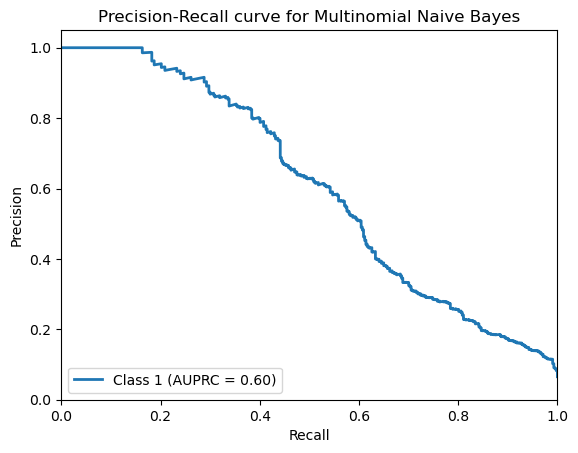

In [54]:
clf = MultinomialNB()
clf.fit(X_train_bow, y_train_bow)

# Predict the class labels of test data
y_pred = clf.predict(X_test_bow)

y_score = clf.predict_proba(X_test_bow)


# Print the accuracy
print("Accuracy:", accuracy_score(y_test_bow, y_pred))

print("F1 score:", f1_score(y_test_bow, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test_bow, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test_bow, y_pred))

precision, recall, _ = precision_recall_curve(y_test_bow, y_score[:, 1])

# Compute the AUPRC and plot the results
auprc = auc(recall, precision)
plt.plot(recall, precision, lw=2, label='Class 1 (AUPRC = {0:0.2f})'.format(auprc))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for Multinomial Naive Bayes')
plt.legend(loc="lower left")
plt.show()

Accuracy: 0.9605386783589102
F1 score: 0.6134969325153374
              precision    recall  f1-score   support

           0      0.965     0.994     0.979      5969
           1      0.851     0.480     0.613       417

    accuracy                          0.961      6386
   macro avg      0.908     0.737     0.796      6386
weighted avg      0.957     0.961     0.955      6386

[[5934   35]
 [ 217  200]]


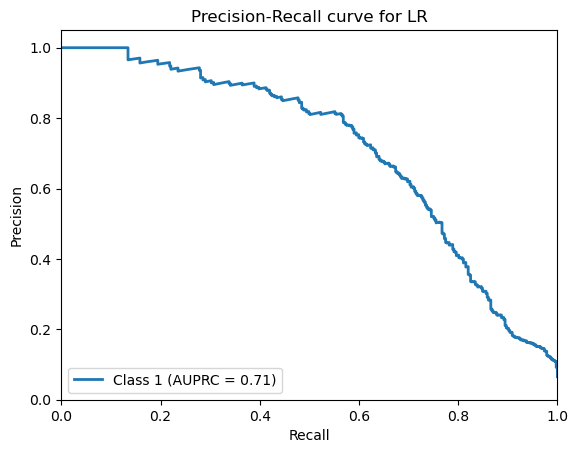

In [55]:
bow_clf_lr = LogisticRegression(max_iter=1000, solver='liblinear')
bow_clf_lr.fit(X_train_bow, y_train_bow)

# Predict the class labels of test data
y_pred = bow_clf_lr.predict(X_test_bow)

y_score = bow_clf_lr.predict_proba(X_test_bow)


# Print the accuracy
print("Accuracy:", accuracy_score(y_test_bow, y_pred))

print("F1 score:", f1_score(y_test_bow, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test_bow, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test_bow, y_pred))

precision, recall, _ = precision_recall_curve(y_test_bow, y_score[:, 1])

# Compute the AUPRC and plot the results
auprc = auc(recall, precision)
plt.plot(recall, precision, lw=2, label='Class 1 (AUPRC = {0:0.2f})'.format(auprc))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for LR')
plt.legend(loc="lower left")
plt.show()

Accuracy: 0.9461321641089884
F1 score: 0.3699633699633699
              precision    recall  f1-score   support

           0      0.949     0.995     0.972      5969
           1      0.783     0.242     0.370       417

    accuracy                          0.946      6386
   macro avg      0.866     0.619     0.671      6386
weighted avg      0.939     0.946     0.933      6386

[[5941   28]
 [ 316  101]]


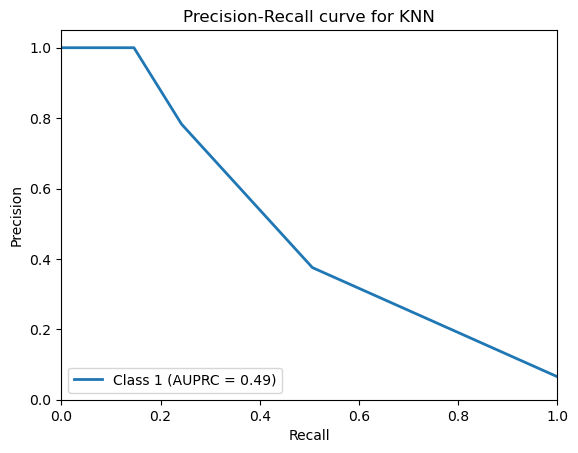

In [56]:
bow_clf_knn = KNeighborsClassifier(n_neighbors=3)
bow_clf_knn.fit(X_train_bow, y_train_bow)

# Predict the class labels of test data
y_pred = bow_clf_knn.predict(X_test_bow)

y_score = bow_clf_knn.predict_proba(X_test_bow)


# Print the accuracy
print("Accuracy:", accuracy_score(y_test_bow, y_pred))

print("F1 score:", f1_score(y_test_bow, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test_bow, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test_bow, y_pred))

precision, recall, _ = precision_recall_curve(y_test_bow, y_score[:, 1])

# Compute the AUPRC and plot the results
auprc = auc(recall, precision)
plt.plot(recall, precision, lw=2, label='Class 1 (AUPRC = {0:0.2f})'.format(auprc))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for KNN')
plt.legend(loc="lower left")
plt.show()

In [57]:
bow_clf_rfc = RandomForestClassifier(n_estimators=100, random_state=42)
bow_clf_rfc.fit(X_train_bow, y_train_bow)

# Predict the class labels of test data
y_pred = bow_clf_rfc.predict(X_test_bow)

# y_score = bow_clf_rfc.predict_proba(X_test_bow)


# Print the accuracy
print("Accuracy:", accuracy_score(y_test_bow, y_pred))

print("F1 score:", f1_score(y_test_bow, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test_bow, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test_bow, y_pred))

# precision, recall, _ = precision_recall_curve(y_test_bow, y_score[:, 1])

# # Compute the AUPRC and plot the results
# auprc = auc(recall, precision)
# plt.plot(recall, precision, lw=2, label='Class 1 (AUPRC = {0:0.2f})'.format(auprc))

# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall curve for RFC')
# plt.legend(loc="lower left")
# plt.show()

Accuracy: 0.9628875665518322
F1 score: 0.654014598540146
              precision    recall  f1-score   support

           0      0.968     0.993     0.980      5969
           1      0.836     0.537     0.654       417

    accuracy                          0.963      6386
   macro avg      0.902     0.765     0.817      6386
weighted avg      0.960     0.963     0.959      6386

[[5925   44]
 [ 193  224]]


on TFIDF

Accuracy: 0.9447228311932352
F1 score: 0.2661122661122661
              precision    recall  f1-score   support

           0      0.944     1.000     0.971      5969
           1      1.000     0.153     0.266       417

    accuracy                          0.945      6386
   macro avg      0.972     0.577     0.619      6386
weighted avg      0.948     0.945     0.925      6386

[[5969    0]
 [ 353   64]]


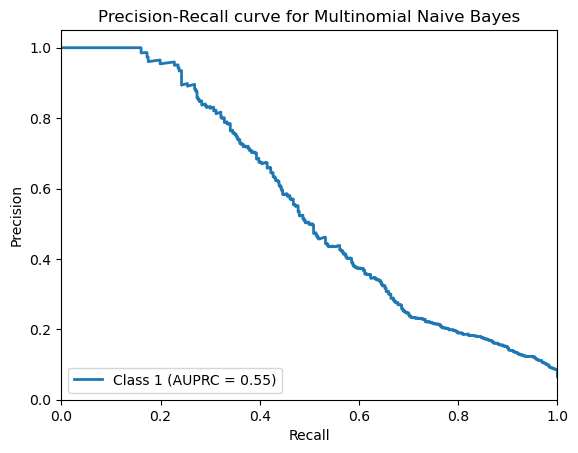

In [58]:
tfidf_clf_mnb = MultinomialNB()
tfidf_clf_mnb.fit(X_train_tfidf, y_train_tfidf)

# Predict the class labels of test data
y_pred = tfidf_clf_mnb.predict(X_test_tfidf)

y_score = tfidf_clf_mnb.predict_proba(X_test_tfidf)


# Print the accuracy
print("Accuracy:", accuracy_score(y_test_tfidf, y_pred))

print("F1 score:", f1_score(y_test_tfidf, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test_tfidf, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test_tfidf, y_pred))

precision, recall, _ = precision_recall_curve(y_test_tfidf, y_score[:, 1])

# Compute the AUPRC and plot the results
auprc = auc(recall, precision)
plt.plot(recall, precision, lw=2, label='Class 1 (AUPRC = {0:0.2f})'.format(auprc))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for Multinomial Naive Bayes')
plt.legend(loc="lower left")
plt.show()

Accuracy: 0.9483244597557157
F1 score: 0.37022900763358774
              precision    recall  f1-score   support

           0      0.949     0.998     0.973      5969
           1      0.907     0.233     0.370       417

    accuracy                          0.948      6386
   macro avg      0.928     0.615     0.672      6386
weighted avg      0.946     0.948     0.934      6386

[[5959   10]
 [ 320   97]]


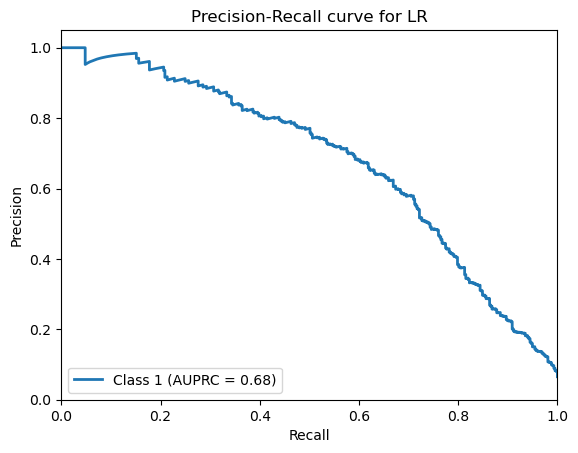

In [59]:
tfidf_clf_lr = LogisticRegression(max_iter=1000, solver='liblinear')
tfidf_clf_lr.fit(X_train_tfidf, y_train_tfidf)

# Predict the class labels of test data
y_pred = tfidf_clf_lr.predict(X_test_tfidf)

y_score = tfidf_clf_lr.predict_proba(X_test_tfidf)


# Print the accuracy
print("Accuracy:", accuracy_score(y_test_tfidf, y_pred))

print("F1 score:", f1_score(y_test_tfidf, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test_tfidf, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test_tfidf, y_pred))

precision, recall, _ = precision_recall_curve(y_test_tfidf, y_score[:, 1])

# Compute the AUPRC and plot the results
auprc = auc(recall, precision)
plt.plot(recall, precision, lw=2, label='Class 1 (AUPRC = {0:0.2f})'.format(auprc))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for LR')
plt.legend(loc="lower left")
plt.show()

Accuracy: 0.9528656435953649
F1 score: 0.46725663716814153
              precision    recall  f1-score   support

           0      0.954     0.997     0.975      5969
           1      0.892     0.317     0.467       417

    accuracy                          0.953      6386
   macro avg      0.923     0.657     0.721      6386
weighted avg      0.950     0.953     0.942      6386

[[5953   16]
 [ 285  132]]


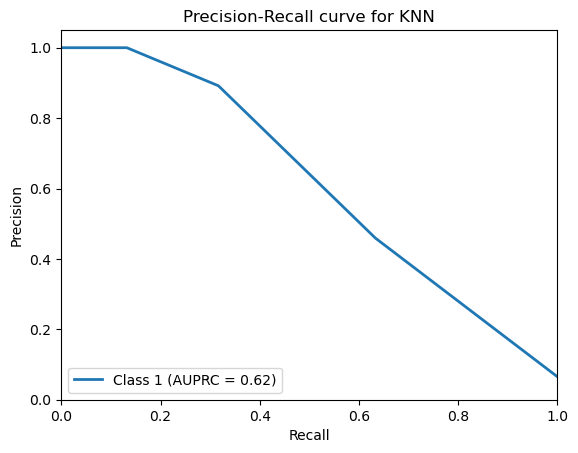

In [60]:
tfidf_clf_knn = KNeighborsClassifier(n_neighbors=3)
tfidf_clf_knn.fit(X_train_tfidf, y_train_tfidf)

# Predict the class labels of test data
y_pred = tfidf_clf_knn.predict(X_test_tfidf)

y_score = tfidf_clf_knn.predict_proba(X_test_tfidf)


# Print the accuracy
print("Accuracy:", accuracy_score(y_test_tfidf, y_pred))

print("F1 score:", f1_score(y_test_tfidf, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test_tfidf, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test_tfidf, y_pred))

precision, recall, _ = precision_recall_curve(y_test_tfidf, y_score[:, 1])

# Compute the AUPRC and plot the results
auprc = auc(recall, precision)
plt.plot(recall, precision, lw=2, label='Class 1 (AUPRC = {0:0.2f})'.format(auprc))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for KNN')
plt.legend(loc="lower left")
plt.show()

Accuracy: 0.945662386470404
F1 score: 0.46533127889060094
              precision    recall  f1-score   support

           0      0.957     0.986     0.971      5969
           1      0.651     0.362     0.465       417

    accuracy                          0.946      6386
   macro avg      0.804     0.674     0.718      6386
weighted avg      0.937     0.946     0.938      6386

[[5888   81]
 [ 266  151]]


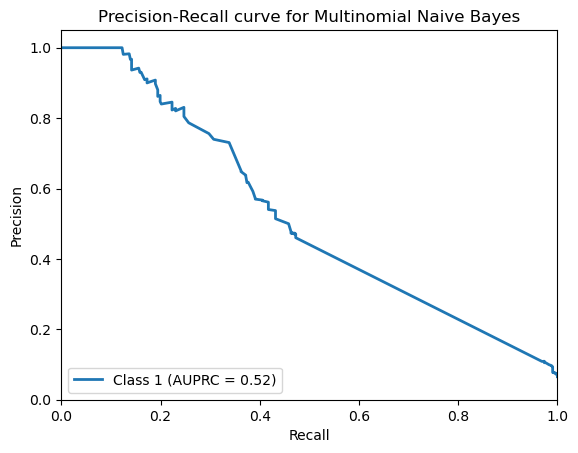

In [61]:
tfidf_clf_abc = AdaBoostClassifier()
tfidf_clf_abc.fit(X_train_tfidf, y_train_tfidf)

# Predict the class labels of test data
y_pred = tfidf_clf_abc.predict(X_test_tfidf)

y_score = tfidf_clf_abc.predict_proba(X_test_tfidf)


# Print the accuracy
print("Accuracy:", accuracy_score(y_test_tfidf, y_pred))

print("F1 score:", f1_score(y_test_tfidf, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test_tfidf, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test_tfidf, y_pred))

precision, recall, _ = precision_recall_curve(y_test_tfidf, y_score[:, 1])

# Compute the AUPRC and plot the results
auprc = auc(recall, precision)
plt.plot(recall, precision, lw=2, label='Class 1 (AUPRC = {0:0.2f})'.format(auprc))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for Multinomial Naive Bayes')
plt.legend(loc="lower left")
plt.show()

In [62]:
tfidf_clf_rfc = RandomForestClassifier(n_estimators=100, random_state=42)
tfidf_clf_rfc.fit(X_train_tfidf, y_train_tfidf)

# Predict the class labels of test data
y_pred = tfidf_clf_rfc.predict(X_test_tfidf)

# y_score = tfidf_clf_rfc.predict_proba(X_test_tfidf)


# Print the accuracy
print("Accuracy:", accuracy_score(y_test_tfidf, y_pred))

print("F1 score:", f1_score(y_test_tfidf, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test_tfidf, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test_tfidf, y_pred))

# precision, recall, _ = precision_recall_curve(y_test_tfidf, y_score[:, 1])

# # Compute the AUPRC and plot the results
# auprc = auc(recall, precision)
# plt.plot(recall, precision, lw=2, label='Class 1 (AUPRC = {0:0.2f})'.format(auprc))

# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall curve for RFC')
# plt.legend(loc="lower left")
# plt.show()

Accuracy: 0.9641403069213905
F1 score: 0.6546003016591251
              precision    recall  f1-score   support

           0      0.967     0.995     0.981      5969
           1      0.882     0.520     0.655       417

    accuracy                          0.964      6386
   macro avg      0.925     0.758     0.818      6386
weighted avg      0.962     0.964     0.960      6386

[[5940   29]
 [ 200  217]]


In [63]:
with open('best_classifier.pkl', 'wb') as f:
        pickle.dump(tfidf_clf_rfc, f)

On W2V

In [64]:
# import gaussian naive bayes
from sklearn.naive_bayes import GaussianNB

Accuracy: 0.3803103934786017
F1 score: 0.13292388681728448
              precision    recall  f1-score   support

         0.0      0.941     0.357     0.518      5942
         1.0      0.074     0.693     0.133       437

    accuracy                          0.380      6379
   macro avg      0.507     0.525     0.325      6379
weighted avg      0.881     0.380     0.491      6379

[[2123 3819]
 [ 134  303]]


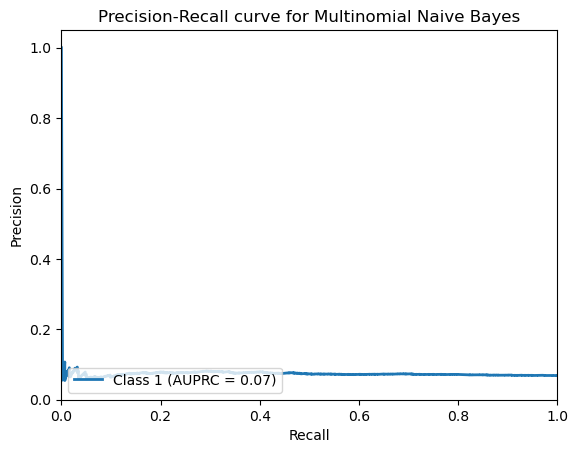

In [65]:
w2v_clf_gnb = GaussianNB()
w2v_clf_gnb.fit(X_train_w2v, y_train_w2v)

# Predict the class labels of test data
y_pred = w2v_clf_gnb.predict(X_test_w2v)

y_score = w2v_clf_gnb.predict_proba(X_test_w2v)


# Print the accuracy
print("Accuracy:", accuracy_score(y_test_w2v, y_pred))

print("F1 score:", f1_score(y_test_w2v, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test_w2v, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test_w2v, y_pred))

precision, recall, _ = precision_recall_curve(y_test_w2v, y_score[:, 1])

# Compute the AUPRC and plot the results
auprc = auc(recall, precision)
plt.plot(recall, precision, lw=2, label='Class 1 (AUPRC = {0:0.2f})'.format(auprc))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for Multinomial Naive Bayes')
plt.legend(loc="lower left")
plt.show()

In [66]:
from sklearn.linear_model import LogisticRegression

Accuracy: 0.9314939645712494
F1 score: 0.0
              precision    recall  f1-score   support

         0.0      0.931     1.000     0.965      5942
         1.0      0.000     0.000     0.000       437

    accuracy                          0.931      6379
   macro avg      0.466     0.500     0.482      6379
weighted avg      0.868     0.931     0.898      6379

[[5942    0]
 [ 437    0]]


c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


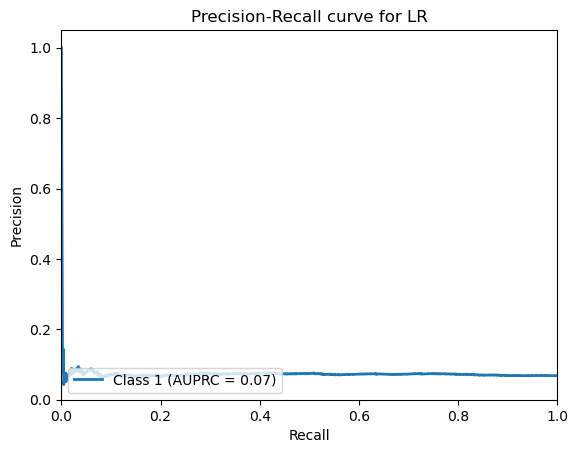

In [67]:
w2v_clf_lr = LogisticRegression(max_iter=1000, solver='liblinear')
w2v_clf_lr.fit(X_train_w2v, y_train_w2v)

# Predict the class labels of test data
y_pred = w2v_clf_lr.predict(X_test_w2v)

y_score = w2v_clf_lr.predict_proba(X_test_w2v)


# Print the accuracy
print("Accuracy:", accuracy_score(y_test_w2v, y_pred))

print("F1 score:", f1_score(y_test_w2v, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test_w2v, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test_w2v, y_pred))

precision, recall, _ = precision_recall_curve(y_test_w2v, y_score[:, 1])

# Compute the AUPRC and plot the results
auprc = auc(recall, precision)
plt.plot(recall, precision, lw=2, label='Class 1 (AUPRC = {0:0.2f})'.format(auprc))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for LR')
plt.legend(loc="lower left")
plt.show()

Accuracy: 0.9189528139206772
F1 score: 0.018975332068311195
              precision    recall  f1-score   support

         0.0      0.931     0.986     0.958      5942
         1.0      0.056     0.011     0.019       437

    accuracy                          0.919      6379
   macro avg      0.493     0.499     0.488      6379
weighted avg      0.871     0.919     0.893      6379

[[5857   85]
 [ 432    5]]


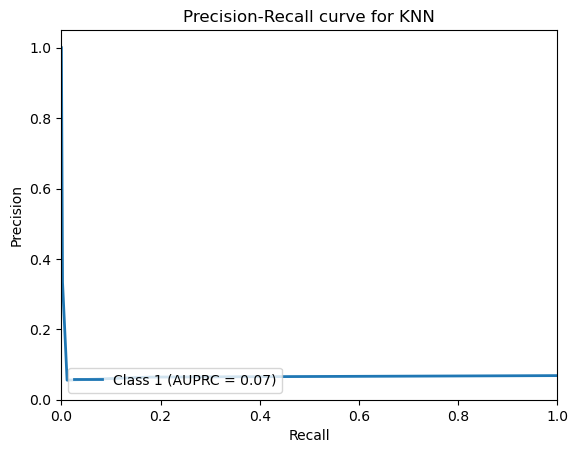

In [68]:
w2v_clf_knn = KNeighborsClassifier(n_neighbors=3)
w2v_clf_knn.fit(X_train_w2v, y_train_w2v)

# Predict the class labels of test data
y_pred = w2v_clf_knn.predict(X_test_w2v)

y_score = w2v_clf_knn.predict_proba(X_test_w2v)


# Print the accuracy
print("Accuracy:", accuracy_score(y_test_w2v, y_pred))

print("F1 score:", f1_score(y_test_w2v, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test_w2v, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test_w2v, y_pred))

precision, recall, _ = precision_recall_curve(y_test_w2v, y_score[:, 1])

# Compute the AUPRC and plot the results
auprc = auc(recall, precision)
plt.plot(recall, precision, lw=2, label='Class 1 (AUPRC = {0:0.2f})'.format(auprc))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for KNN')
plt.legend(loc="lower left")
plt.show()

In [69]:
from sklearn.svm import SVC

In [70]:
w2v_clf_svc = SVC(kernel='sigmoid', C=0.01, random_state=42)
w2v_clf_svc.fit(X_train_w2v, y_train_w2v)

# Predict the class labels of test data
y_pred = w2v_clf_svc.predict(X_test_w2v)

# y_score = w2v_clf_svc.predict_proba(X_test_w2v)


# Print the accuracy
print("Accuracy:", accuracy_score(y_test_w2v, y_pred))

print("F1 score:", f1_score(y_test_w2v, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test_w2v, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test_w2v, y_pred))

Accuracy: 0.9314939645712494
F1 score: 0.0
              precision    recall  f1-score   support

         0.0      0.931     1.000     0.965      5942
         1.0      0.000     0.000     0.000       437

    accuracy                          0.931      6379
   macro avg      0.466     0.500     0.482      6379
weighted avg      0.868     0.931     0.898      6379

[[5942    0]
 [ 437    0]]


c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9236557454146418
F1 score: 0.01616161616161616
              precision    recall  f1-score   support

         0.0      0.931     0.991     0.960      5942
         1.0      0.069     0.009     0.016       437

    accuracy                          0.924      6379
   macro avg      0.500     0.500     0.488      6379
weighted avg      0.872     0.924     0.896      6379

[[5888   54]
 [ 433    4]]


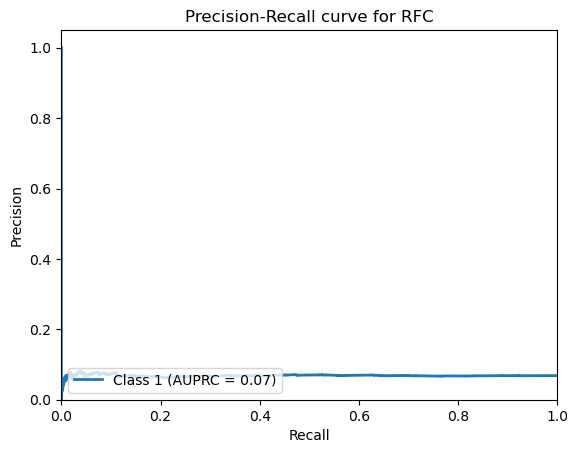

In [71]:
w2v_clf_rfc = RandomForestClassifier(n_estimators=100, random_state=42)
w2v_clf_rfc.fit(X_train_w2v, y_train_w2v)

# Predict the class labels of test data
y_pred = w2v_clf_rfc.predict(X_test_w2v)

y_score = w2v_clf_rfc.predict_proba(X_test_w2v)


# Print the accuracy
print("Accuracy:", accuracy_score(y_test_w2v, y_pred))

print("F1 score:", f1_score(y_test_w2v, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test_w2v, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test_w2v, y_pred))

precision, recall, _ = precision_recall_curve(y_test_w2v, y_score[:, 1])

# Compute the AUPRC and plot the results
auprc = auc(recall, precision)
plt.plot(recall, precision, lw=2, label='Class 1 (AUPRC = {0:0.2f})'.format(auprc))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for RFC')
plt.legend(loc="lower left")
plt.show()

On tfidf+w2v

Accuracy: 0.34597899357266026
F1 score: 0.1315570358034971
              precision    recall  f1-score   support

         0.0      0.940     0.318     0.475      5942
         1.0      0.072     0.723     0.132       437

    accuracy                          0.346      6379
   macro avg      0.506     0.521     0.304      6379
weighted avg      0.880     0.346     0.452      6379

[[1891 4051]
 [ 121  316]]


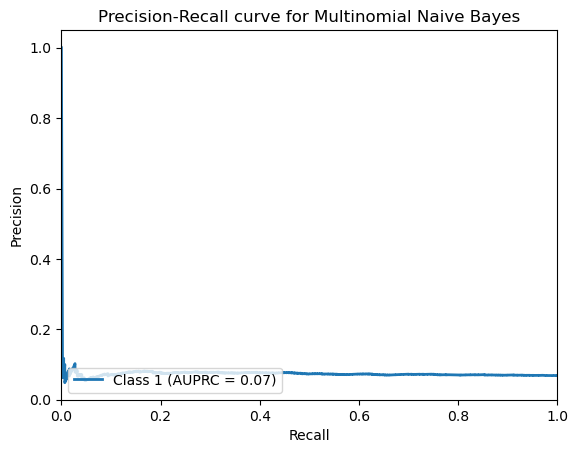

In [72]:
weight_clf_gnb = GaussianNB()
weight_clf_gnb.fit(X_train_weight, y_train_weight)

# Predict the class labels of test data
y_pred = weight_clf_gnb.predict(X_test_weight)

y_score = weight_clf_gnb.predict_proba(X_test_weight)


# Print the accuracy
print("Accuracy:", accuracy_score(y_test_weight, y_pred))

print("F1 score:", f1_score(y_test_weight, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test_weight, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test_weight, y_pred))

precision, recall, _ = precision_recall_curve(y_test_weight, y_score[:, 1])

# Compute the AUPRC and plot the results
auprc = auc(recall, precision)
plt.plot(recall, precision, lw=2, label='Class 1 (AUPRC = {0:0.2f})'.format(auprc))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for Multinomial Naive Bayes')
plt.legend(loc="lower left")
plt.show()

Accuracy: 0.9314939645712494
F1 score: 0.0
              precision    recall  f1-score   support

         0.0      0.931     1.000     0.965      5942
         1.0      0.000     0.000     0.000       437

    accuracy                          0.931      6379
   macro avg      0.466     0.500     0.482      6379
weighted avg      0.868     0.931     0.898      6379

[[5942    0]
 [ 437    0]]


c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


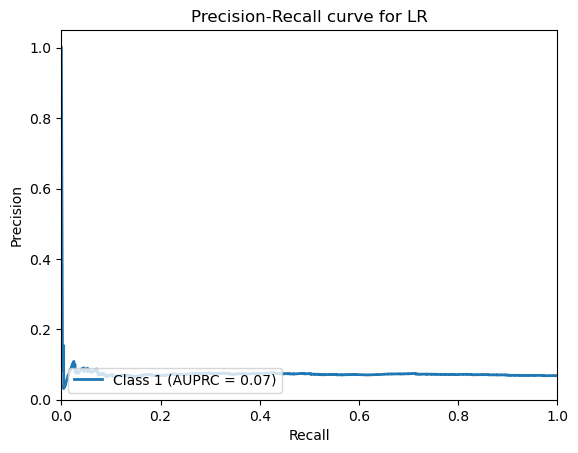

In [73]:
weight_clf_lr = LogisticRegression(max_iter=1000, solver='liblinear')
weight_clf_lr.fit(X_train_weight, y_train_weight)

# Predict the class labels of test data
y_pred = weight_clf_lr.predict(X_test_weight)

y_score = weight_clf_lr.predict_proba(X_test_weight)


# Print the accuracy
print("Accuracy:", accuracy_score(y_test_weight, y_pred))

print("F1 score:", f1_score(y_test_weight, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test_weight, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test_weight, y_pred))

precision, recall, _ = precision_recall_curve(y_test_weight, y_score[:, 1])

# Compute the AUPRC and plot the results
auprc = auc(recall, precision)
plt.plot(recall, precision, lw=2, label='Class 1 (AUPRC = {0:0.2f})'.format(auprc))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for LR')
plt.legend(loc="lower left")
plt.show()

Accuracy: 0.9314939645712494
F1 score: 0.0
              precision    recall  f1-score   support

         0.0      0.931     1.000     0.965      5942
         1.0      0.000     0.000     0.000       437

    accuracy                          0.931      6379
   macro avg      0.466     0.500     0.482      6379
weighted avg      0.868     0.931     0.898      6379

[[5942    0]
 [ 437    0]]


c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


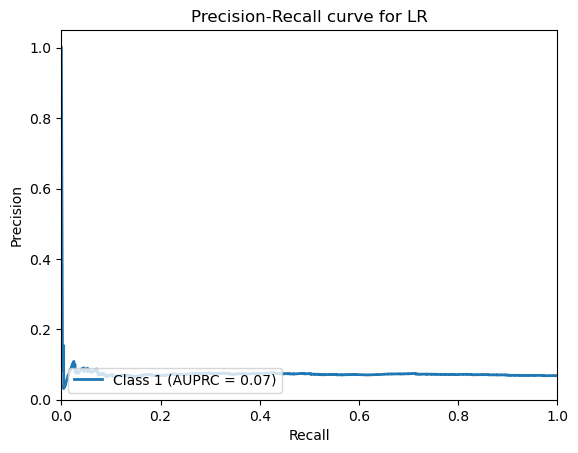

In [74]:
weight_clf_lr = LogisticRegression(max_iter=1000, solver='liblinear')
weight_clf_lr.fit(X_train_weight, y_train_weight)

# Predict the class labels of test data
y_pred = weight_clf_lr.predict(X_test_weight)

y_score = weight_clf_lr.predict_proba(X_test_weight)


# Print the accuracy
print("Accuracy:", accuracy_score(y_test_weight, y_pred))

print("F1 score:", f1_score(y_test_weight, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test_weight, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test_weight, y_pred))

precision, recall, _ = precision_recall_curve(y_test_weight, y_score[:, 1])

# Compute the AUPRC and plot the results
auprc = auc(recall, precision)
plt.plot(recall, precision, lw=2, label='Class 1 (AUPRC = {0:0.2f})'.format(auprc))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for LR')
plt.legend(loc="lower left")
plt.show()

Accuracy: 0.9194231070700737
F1 score: 0.03383458646616541
              precision    recall  f1-score   support

         0.0      0.932     0.986     0.958      5942
         1.0      0.095     0.021     0.034       437

    accuracy                          0.919      6379
   macro avg      0.513     0.503     0.496      6379
weighted avg      0.875     0.919     0.895      6379

[[5856   86]
 [ 428    9]]


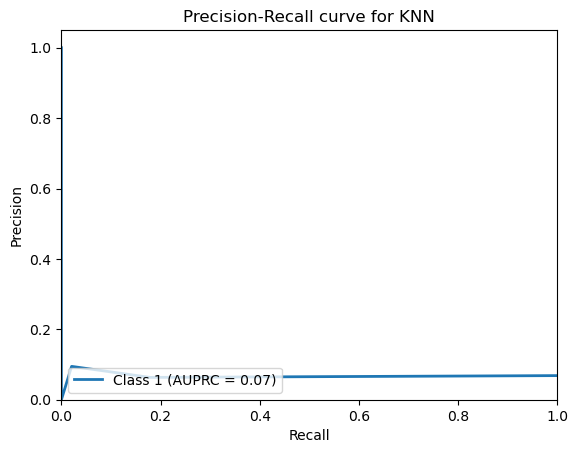

In [75]:
weight_clf_knn = KNeighborsClassifier(n_neighbors=3)
weight_clf_knn.fit(X_train_weight, y_train_weight)

# Predict the class labels of test data
y_pred = weight_clf_knn.predict(X_test_weight)

y_score = weight_clf_knn.predict_proba(X_test_weight)


# Print the accuracy
print("Accuracy:", accuracy_score(y_test_weight, y_pred))

print("F1 score:", f1_score(y_test_weight, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test_weight, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test_weight, y_pred))

precision, recall, _ = precision_recall_curve(y_test_weight, y_score[:, 1])

# Compute the AUPRC and plot the results
auprc = auc(recall, precision)
plt.plot(recall, precision, lw=2, label='Class 1 (AUPRC = {0:0.2f})'.format(auprc))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for KNN')
plt.legend(loc="lower left")
plt.show()

In [76]:
weight_clf_svc = SVC(kernel='sigmoid', C=0.01, random_state=42)
weight_clf_svc.fit(X_train_weight, y_train_weight)

# Predict the class labels of test data
y_pred = weight_clf_svc.predict(X_test_weight)

# y_score = w2v_clf_svc.predict_proba(X_test_w2v)


# Print the accuracy
print("Accuracy:", accuracy_score(y_test_weight, y_pred))

print("F1 score:", f1_score(y_test_weight, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test_weight, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test_weight, y_pred))

Accuracy: 0.9314939645712494
F1 score: 0.0
              precision    recall  f1-score   support

         0.0      0.931     1.000     0.965      5942
         1.0      0.000     0.000     0.000       437

    accuracy                          0.931      6379
   macro avg      0.466     0.500     0.482      6379
weighted avg      0.868     0.931     0.898      6379

[[5942    0]
 [ 437    0]]


c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\soham\miniconda3\envs\PRML_Lab\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9236557454146418
F1 score: 0.012170385395537525
              precision    recall  f1-score   support

         0.0      0.931     0.991     0.960      5942
         1.0      0.054     0.007     0.012       437

    accuracy                          0.924      6379
   macro avg      0.492     0.499     0.486      6379
weighted avg      0.871     0.924     0.895      6379

[[5889   53]
 [ 434    3]]


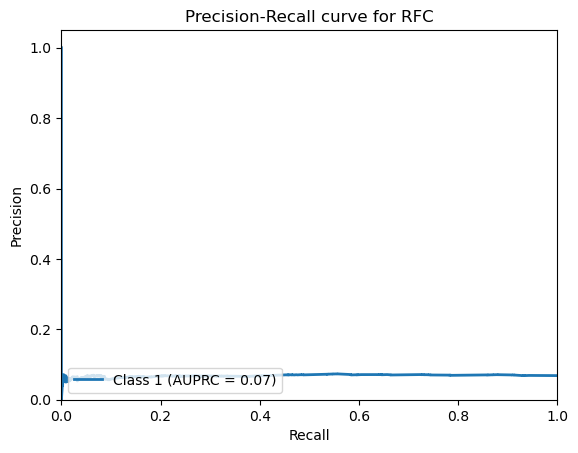

In [77]:
weight_clf_rfc = RandomForestClassifier(n_estimators=100, random_state=42)
weight_clf_rfc.fit(X_train_weight, y_train_weight)

# Predict the class labels of test data
y_pred = weight_clf_rfc.predict(X_test_weight)

y_score = weight_clf_rfc.predict_proba(X_test_weight)


# Print the accuracy
print("Accuracy:", accuracy_score(y_test_weight, y_pred))

print("F1 score:", f1_score(y_test_weight, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test_weight, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test_weight, y_pred))

precision, recall, _ = precision_recall_curve(y_test_weight, y_score[:, 1])

# Compute the AUPRC and plot the results
auprc = auc(recall, precision)
plt.plot(recall, precision, lw=2, label='Class 1 (AUPRC = {0:0.2f})'.format(auprc))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for RFC')
plt.legend(loc="lower left")
plt.show()

## Testing the models on SMOTE

In [48]:
from sklearn.utils import resample
def upsample(df,new_size):
    df_majority = df[df.label==0]
    df_minority = df[df.label==1]

    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                    replace=True,     # sample with replacement
                                    n_samples=new_size,    # to match majority class
                                    random_state=42) # reproducible results

    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled])
    return df_upsampled
    # Display new class counts

In [49]:
bow_df = pd.DataFrame(bow_array)

In [52]:
bow_df['label'] = y

In [53]:
bow_df

0  1  2  3  4  5  6  7  8  9  ...  36661  36662  36663  36664  36665  \
0      0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
1      0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
2      0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
3      0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
4      0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
...   .. .. .. .. .. .. .. .. .. ..  ...    ...    ...    ...    ...    ...   
31923  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
31924  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
31925  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
31926  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
31927  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   

       36666  36667  36668  36669  label  
0          0      0      0      0    0.0  
1          0      0      0      0    0.0  
2          0      0      0      0    0.0  
3          0      0      0      0    0.0  
4          0      0      0      0    0.0  
...      ...    ...    ...    ...    ...  
31923      0      0      0      0    0.0  
31924      0      0      0      0    0.0  
31925      0      0      0      0    0.0  
31926      0      0      0      0    1.0  
31927      0      0      0      0    0.0  

[31928 rows x 36671 columns]

In [59]:
del bow_array

In [69]:
#apply lda on bow_df
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(bow_df.drop('label',axis=1))
    
#transform bow_df
bow_df_lda = lda.transform(bow_df.drop('label',axis=1))

bow_df_lda = pd.DataFrame(bow_df_lda)
    

MemoryError: Unable to allocate 8.71 GiB for an array with shape (31894, 36670) and data type float64

In [68]:
del bow_df_lda

In [61]:
#perform tts split on bow_df_lda
X_train_bow_lda, X_test_bow_lda, y_train_bow_lda, y_test_bow_lda = train_test_split(bow_df_lda, bow_df['label'], test_size=0.2, random_state=42)

In [66]:
bow_df['label'].isnull().sum()

34

In [67]:
#drop the null values
bow_df.dropna(inplace=True)

In [62]:
bow_lda_clf_rfc = RandomForestClassifier(n_estimators=100, random_state=42)
bow_lda_clf_rfc.fit(X_train_bow_lda, y_train_bow_lda)

# Predict the class labels of test data
y_pred = bow_lda_clf_rfc.predict(X_test_bow_lda)

y_score = bow_lda_clf_rfc.predict_proba(X_test_bow_lda)


# Print the accuracy
print("Accuracy:", accuracy_score(y_test_bow_lda, y_pred))

print("F1 score:", f1_score(y_test_bow_lda, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test_bow_lda, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test_weight, y_pred))

precision, recall, _ = precision_recall_curve(y_test_weight, y_score[:, 1])

# Compute the AUPRC and plot the results
auprc = auc(recall, precision)
plt.plot(recall, precision, lw=2, label='Class 1 (AUPRC = {0:0.2f})'.format(auprc))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for RFC')
plt.legend(loc="lower left")
plt.show()

ValueError: Input y contains NaN.

In [56]:
upsampled_bow_df = upsample(bow_df, 4000)

MemoryError: Unable to allocate 8.10 GiB for an array with shape (29663, 36670) and data type int64

In [78]:
from imblearn.over_sampling import SMOTE

def smote(X,y):
    #Function to apply smote
    oversample = SMOTE()
    return oversample.fit_resample(X, y)

In [79]:
X_train_w2v_smote, y_train_w2v_smote = smote(X_train_w2v,y_train_w2v)

In [80]:
X_train_weight_smote, y_train_weight_smote = smote(X_train_weight,y_train_weight)

In [81]:
del X_train_w2v,y_train_w2v, X_train_weight,y_train_weight

On w2v

Accuracy: 0.30788524847154725
F1 score: 0.13004926108374384
              precision    recall  f1-score   support

         0.0      0.939     0.275     0.425      5942
         1.0      0.071     0.755     0.130       437

    accuracy                          0.308      6379
   macro avg      0.505     0.515     0.278      6379
weighted avg      0.879     0.308     0.405      6379

[[1634 4308]
 [ 107  330]]


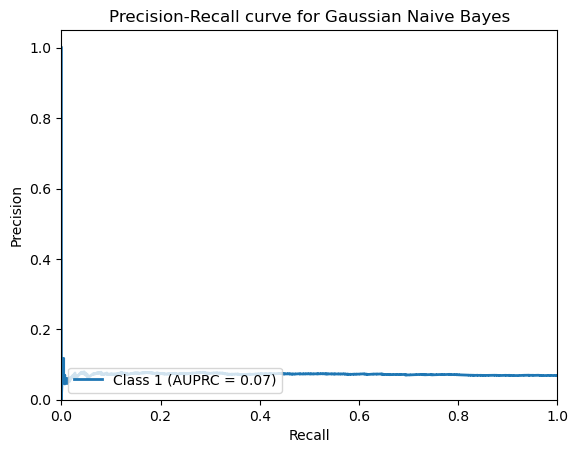

In [82]:
w2v_clf_gnb_smote = GaussianNB()
w2v_clf_gnb_smote.fit(X_train_w2v_smote, y_train_w2v_smote)

# Predict the class labels of test data
y_pred = w2v_clf_gnb_smote.predict(X_test_w2v)

y_score = w2v_clf_gnb_smote.predict_proba(X_test_w2v)


# Print the accuracy
print("Accuracy:", accuracy_score(y_test_w2v, y_pred))

print("F1 score:", f1_score(y_test_w2v, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test_w2v, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test_w2v, y_pred))

precision, recall, _ = precision_recall_curve(y_test_w2v, y_score[:, 1])

# Compute the AUPRC and plot the results
auprc = auc(recall, precision)
plt.plot(recall, precision, lw=2, label='Class 1 (AUPRC = {0:0.2f})'.format(auprc))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for Gaussian Naive Bayes')
plt.legend(loc="lower left")
plt.show()

Accuracy: 0.5069760150493808
F1 score: 0.13193486061275186
              precision    recall  f1-score   support

         0.0      0.938     0.504     0.656      5942
         1.0      0.075     0.547     0.132       437

    accuracy                          0.507      6379
   macro avg      0.507     0.525     0.394      6379
weighted avg      0.879     0.507     0.620      6379

[[2995 2947]
 [ 198  239]]


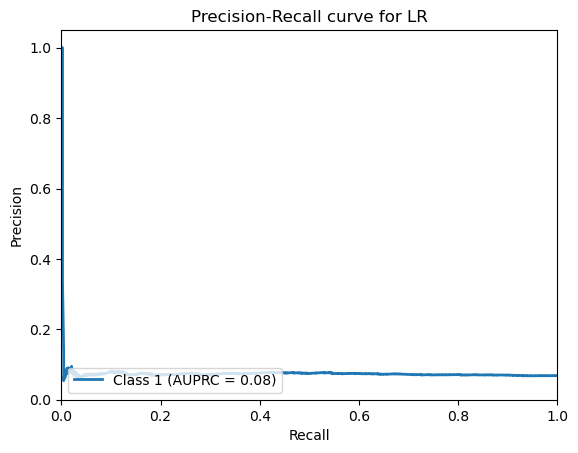

In [83]:
w2v_clf_lr_smote = LogisticRegression(max_iter=1000, solver='liblinear')
w2v_clf_lr_smote.fit(X_train_w2v_smote, y_train_w2v_smote)

# Predict the class labels of test data
y_pred = w2v_clf_lr_smote.predict(X_test_w2v)

y_score = w2v_clf_lr_smote.predict_proba(X_test_w2v)


# Print the accuracy
print("Accuracy:", accuracy_score(y_test_w2v, y_pred))

print("F1 score:", f1_score(y_test_w2v, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test_w2v, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test_w2v, y_pred))

precision, recall, _ = precision_recall_curve(y_test_w2v, y_score[:, 1])

# Compute the AUPRC and plot the results
auprc = auc(recall, precision)
plt.plot(recall, precision, lw=2, label='Class 1 (AUPRC = {0:0.2f})'.format(auprc))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for LR')
plt.legend(loc="lower left")
plt.show()

Accuracy: 0.7305220253958301
F1 score: 0.10047095761381473
              precision    recall  f1-score   support

         0.0      0.930     0.768     0.842      5942
         1.0      0.065     0.220     0.100       437

    accuracy                          0.731      6379
   macro avg      0.498     0.494     0.471      6379
weighted avg      0.871     0.731     0.791      6379

[[4564 1378]
 [ 341   96]]


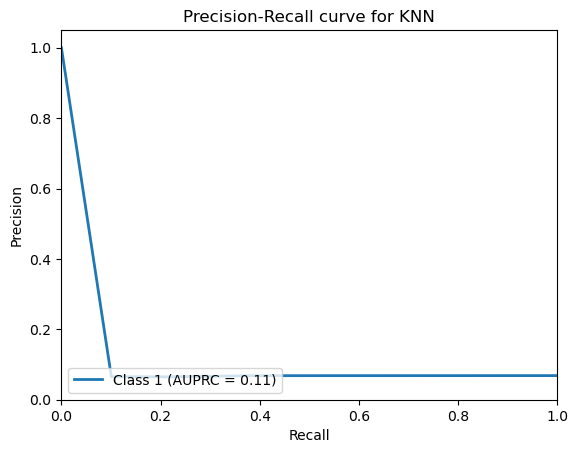

In [84]:
w2v_clf_knn_smote = KNeighborsClassifier(n_neighbors=3)
w2v_clf_knn_smote.fit(X_train_w2v_smote, y_train_w2v_smote)

# Predict the class labels of test data
y_pred = w2v_clf_knn_smote.predict(X_test_w2v)

y_score = w2v_clf_knn_smote.predict_proba(X_test_w2v)


# Print the accuracy
print("Accuracy:", accuracy_score(y_test_w2v, y_pred))

print("F1 score:", f1_score(y_test_w2v, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test_w2v, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test_w2v, y_pred))

precision, recall, _ = precision_recall_curve(y_test_w2v, y_score[:, 1])

# Compute the AUPRC and plot the results
auprc = auc(recall, precision)
plt.plot(recall, precision, lw=2, label='Class 1 (AUPRC = {0:0.2f})'.format(auprc))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for KNN')
plt.legend(loc="lower left")
plt.show()

In [85]:
# w2v_clf_svc_smote = SVC(kernel='sigmoid', C=0.01, random_state=42)
# w2v_clf_svc_smote.fit(X_train_w2v_smote, y_train_w2v_smote)

# # Predict the class labels of test data
# y_pred = w2v_clf_svc.predict(X_test_w2v)

# # y_score = w2v_clf_svc.predict_proba(X_test_w2v)


# # Print the accuracy
# print("Accuracy:", accuracy_score(y_test_w2v, y_pred))

# print("F1 score:", f1_score(y_test_w2v, y_pred))

# # Print the precision and recall, among other metrics
# print(classification_report(y_test_w2v, y_pred, digits=3))

# # Print the confusion matrix
# print(confusion_matrix(y_test_w2v, y_pred))

Accuracy: 0.8835240633328107
F1 score: 0.05590851334180432
              precision    recall  f1-score   support

         0.0      0.931     0.945     0.938      5942
         1.0      0.063     0.050     0.056       437

    accuracy                          0.884      6379
   macro avg      0.497     0.498     0.497      6379
weighted avg      0.872     0.884     0.878      6379

[[5614  328]
 [ 415   22]]


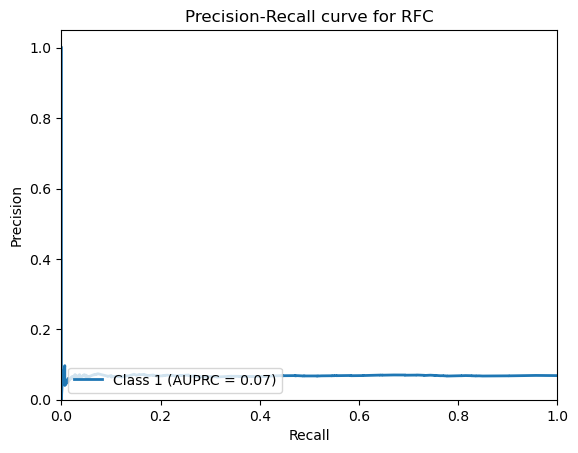

In [86]:
w2v_clf_rfc_smote = RandomForestClassifier(n_estimators=100, random_state=42)
w2v_clf_rfc_smote.fit(X_train_w2v_smote, y_train_w2v_smote)

# Predict the class labels of test data
y_pred = w2v_clf_rfc_smote.predict(X_test_w2v)

y_score = w2v_clf_rfc_smote.predict_proba(X_test_w2v)


# Print the accuracy
print("Accuracy:", accuracy_score(y_test_w2v, y_pred))

print("F1 score:", f1_score(y_test_w2v, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test_w2v, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test_w2v, y_pred))

precision, recall, _ = precision_recall_curve(y_test_w2v, y_score[:, 1])

# Compute the AUPRC and plot the results
auprc = auc(recall, precision)
plt.plot(recall, precision, lw=2, label='Class 1 (AUPRC = {0:0.2f})'.format(auprc))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for RFC')
plt.legend(loc="lower left")
plt.show()

On tfidf+w2v

Accuracy: 0.28719234989810316
F1 score: 0.13042646777586536
              precision    recall  f1-score   support

         0.0      0.940     0.251     0.396      5942
         1.0      0.071     0.780     0.130       437

    accuracy                          0.287      6379
   macro avg      0.505     0.516     0.263      6379
weighted avg      0.880     0.287     0.378      6379

[[1491 4451]
 [  96  341]]


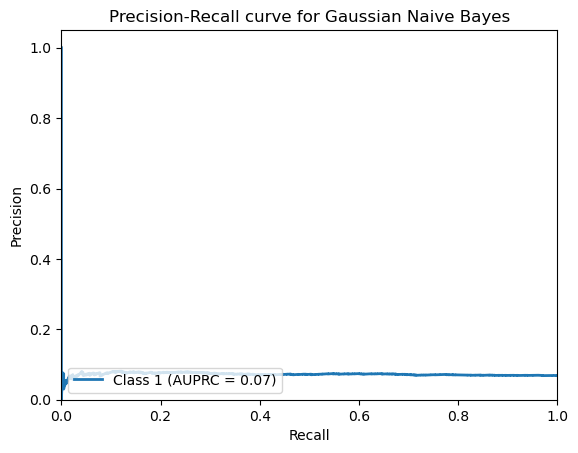

In [87]:
weight_clf_gnb_smote = GaussianNB()
weight_clf_gnb_smote.fit(X_train_weight_smote, y_train_weight_smote)

# Predict the class labels of test data
y_pred = weight_clf_gnb_smote.predict(X_test_weight)

y_score = weight_clf_gnb_smote.predict_proba(X_test_weight)


# Print the accuracy
print("Accuracy:", accuracy_score(y_test_weight, y_pred))

print("F1 score:", f1_score(y_test_weight, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test_weight, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test_weight, y_pred))

precision, recall, _ = precision_recall_curve(y_test_weight, y_score[:, 1])

# Compute the AUPRC and plot the results
auprc = auc(recall, precision)
plt.plot(recall, precision, lw=2, label='Class 1 (AUPRC = {0:0.2f})'.format(auprc))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for Gaussian Naive Bayes')
plt.legend(loc="lower left")
plt.show()

Accuracy: 0.5000783821915661
F1 score: 0.13082583810302534
              precision    recall  f1-score   support

         0.0      0.937     0.496     0.649      5942
         1.0      0.074     0.549     0.131       437

    accuracy                          0.500      6379
   macro avg      0.506     0.523     0.390      6379
weighted avg      0.878     0.500     0.614      6379

[[2950 2992]
 [ 197  240]]


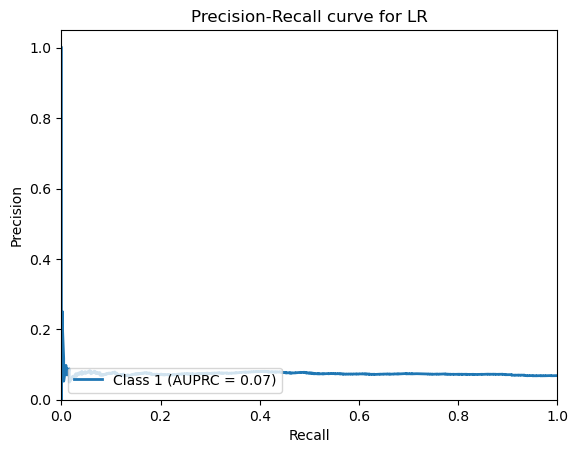

In [88]:
weight_clf_lr_smote = LogisticRegression(max_iter=1000, solver='liblinear')
weight_clf_lr_smote.fit(X_train_weight_smote, y_train_weight_smote)

# Predict the class labels of test data
y_pred = weight_clf_lr_smote.predict(X_test_weight)

y_score = weight_clf_lr_smote.predict_proba(X_test_weight)


# Print the accuracy
print("Accuracy:", accuracy_score(y_test_weight, y_pred))

print("F1 score:", f1_score(y_test_weight, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test_weight, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test_weight, y_pred))

precision, recall, _ = precision_recall_curve(y_test_weight, y_score[:, 1])

# Compute the AUPRC and plot the results
auprc = auc(recall, precision)
plt.plot(recall, precision, lw=2, label='Class 1 (AUPRC = {0:0.2f})'.format(auprc))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for LR')
plt.legend(loc="lower left")
plt.show()

Accuracy: 0.5000783821915661
F1 score: 0.13082583810302534
              precision    recall  f1-score   support

         0.0      0.937     0.496     0.649      5942
         1.0      0.074     0.549     0.131       437

    accuracy                          0.500      6379
   macro avg      0.506     0.523     0.390      6379
weighted avg      0.878     0.500     0.614      6379

[[2950 2992]
 [ 197  240]]


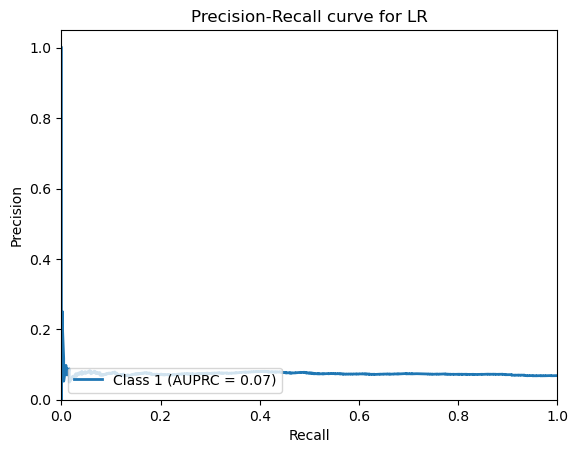

In [89]:
weight_clf_lr_smote = LogisticRegression(max_iter=1000, solver='liblinear')
weight_clf_lr_smote.fit(X_train_weight_smote, y_train_weight_smote)

# Predict the class labels of test data
y_pred = weight_clf_lr_smote.predict(X_test_weight)

y_score = weight_clf_lr_smote.predict_proba(X_test_weight)


# Print the accuracy
print("Accuracy:", accuracy_score(y_test_weight, y_pred))

print("F1 score:", f1_score(y_test_weight, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test_weight, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test_weight, y_pred))

precision, recall, _ = precision_recall_curve(y_test_weight, y_score[:, 1])

# Compute the AUPRC and plot the results
auprc = auc(recall, precision)
plt.plot(recall, precision, lw=2, label='Class 1 (AUPRC = {0:0.2f})'.format(auprc))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for LR')
plt.legend(loc="lower left")
plt.show()

Accuracy: 0.7270732089669227
F1 score: 0.10303967027305513
              precision    recall  f1-score   support

         0.0      0.931     0.764     0.839      5942
         1.0      0.066     0.229     0.103       437

    accuracy                          0.727      6379
   macro avg      0.499     0.496     0.471      6379
weighted avg      0.872     0.727     0.789      6379

[[4538 1404]
 [ 337  100]]


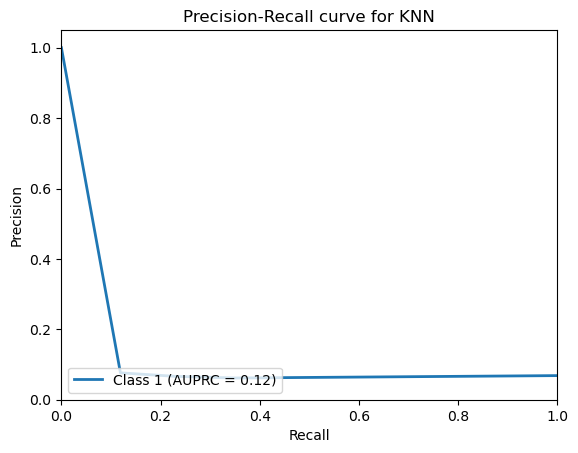

In [90]:
weight_clf_knn_smote = KNeighborsClassifier(n_neighbors=3)
weight_clf_knn_smote.fit(X_train_weight_smote, y_train_weight_smote)

# Predict the class labels of test data
y_pred = weight_clf_knn_smote.predict(X_test_weight)

y_score = weight_clf_knn_smote.predict_proba(X_test_weight)


# Print the accuracy
print("Accuracy:", accuracy_score(y_test_weight, y_pred))

print("F1 score:", f1_score(y_test_weight, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test_weight, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test_weight, y_pred))

precision, recall, _ = precision_recall_curve(y_test_weight, y_score[:, 1])

# Compute the AUPRC and plot the results
auprc = auc(recall, precision)
plt.plot(recall, precision, lw=2, label='Class 1 (AUPRC = {0:0.2f})'.format(auprc))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for KNN')
plt.legend(loc="lower left")
plt.show()

In [91]:
# weight_clf_svc_smote = SVC(kernel='sigmoid', C=0.01, random_state=42)
# weight_clf_svc_smote.fit(X_train_weight_smote, y_train_weight_smote)

# # Predict the class labels of test data
# y_pred = weight_clf_svc.predict(X_test_weight)

# # y_score = w2v_clf_svc.predict_proba(X_test_w2v)


# # Print the accuracy
# print("Accuracy:", accuracy_score(y_test_weight, y_pred))

# print("F1 score:", f1_score(y_test_weight, y_pred))

# # Print the precision and recall, among other metrics
# print(classification_report(y_test_weight, y_pred, digits=3))

# # Print the confusion matrix
# print(confusion_matrix(y_test_weight, y_pred))

Accuracy: 0.8880702304436432
F1 score: 0.07272727272727274
              precision    recall  f1-score   support

         0.0      0.932     0.949     0.940      5942
         1.0      0.084     0.064     0.073       437

    accuracy                          0.888      6379
   macro avg      0.508     0.506     0.507      6379
weighted avg      0.874     0.888     0.881      6379

[[5637  305]
 [ 409   28]]


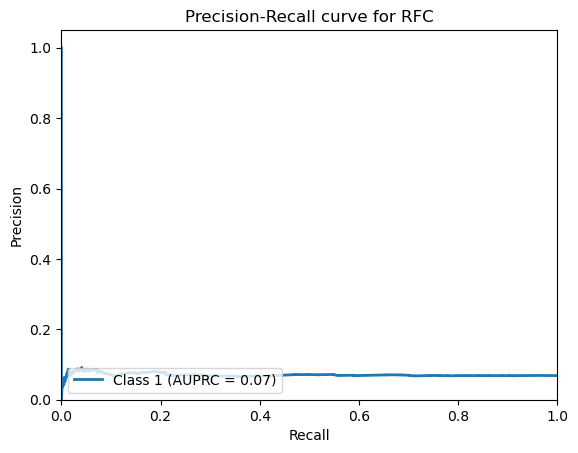

In [92]:
weight_clf_rfc_smote = RandomForestClassifier(n_estimators=100, random_state=42)
weight_clf_rfc_smote.fit(X_train_weight_smote, y_train_weight_smote)

# Predict the class labels of test data
y_pred = weight_clf_rfc_smote.predict(X_test_weight)

y_score = weight_clf_rfc_smote.predict_proba(X_test_weight)


# Print the accuracy
print("Accuracy:", accuracy_score(y_test_weight, y_pred))

print("F1 score:", f1_score(y_test_weight, y_pred))

# Print the precision and recall, among other metrics
print(classification_report(y_test_weight, y_pred, digits=3))

# Print the confusion matrix
print(confusion_matrix(y_test_weight, y_pred))

precision, recall, _ = precision_recall_curve(y_test_weight, y_score[:, 1])

# Compute the AUPRC and plot the results
auprc = auc(recall, precision)
plt.plot(recall, precision, lw=2, label='Class 1 (AUPRC = {0:0.2f})'.format(auprc))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for RFC')
plt.legend(loc="lower left")
plt.show()